### **Libraries import**

In [244]:
import re
import nltk
import requests
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from lxml import etree

from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from openie import StanfordOpenIE
from sklearn.feature_extraction.text import TfidfVectorizer


## **Data Collection**

We are going to scrape transcripts of N speeches of President Joe Biden in 2023 from the official website of the White House and Miller Center using packages:


*   requests
*   BeautifulSoup
*   lxml



In [245]:
sources = [
    {
        'date': '19.09.2023',
        'title': 'Remarks by President Biden Before the 78th Session of the United Nations General Assembly | New York, NY',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/09/19/remarks-by-president-biden-before-the-78th-session-of-the-united-nations-general-assembly-new-york-ny/',
    },
    {
        'date': '29.03.2023',
        'title': 'Remarks by President Biden at the Summit for Democracy Virtual Plenary on Democracy Delivering on Global Challenges',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/03/29/remarks-by-president-biden-at-the-summit-for-democracy-virtual-plenary-on-democracy-delivering-on-global-challenges/',
    },
    {
        'date': '20.10.2023',
        'title': 'Remarks by President Biden on the United States’ Response to Hamas’s Terrorist Attacks Against Israel and Russia’s Ongoing Brutal War Against Ukraine',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/20/remarks-by-president-biden-on-the-unites-states-response-to-hamass-terrorist-attacks-against-israel-and-russias-ongoing-brutal-war-against-ukraine/',
    },
    {
        'date': '11.07.2023',
        'title': 'Remarks by President Biden and President Gitanas Nausėda of Lithuania Before Bilateral Meeting | Vilnius, Lithuania',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/07/11/remarks-by-president-biden-and-president-gitanas-nauseda-of-lithuania-before-bilateral-meeting-vilnius-lithuania/',
    },
    {
        'date': '21.02.2023',
        'title': 'Remarks on the One-Year Anniversary of the Ukraine War',
        'url': 'https://millercenter.org/the-presidency/presidential-speeches/february-21-2023-remarks-one-year-anniversary-ukraine-war',
    },
    {
        'date': '20.05.2023',
        'title': 'Remarks by President Biden, Prime Minister Kishida, Prime Minister Modi, and Prime Minister Albanese at the Third In-Person Quad Leaders’ Summit',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/05/20/remarks-by-president-biden-prime-minister-kishida-prime-minister-modi-and-prime-minister-albanese-at-the-third-in-person-quad-leaders-summit/',
    },
    {
        'date': '20.05.2023',
        'title': 'Remarks by President Biden, Prime Minister Kishida, Prime Minister Modi, and Prime Minister Albanese at the Third In-Person Quad Leaders’ Summit',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/05/20/remarks-by-president-biden-prime-minister-kishida-prime-minister-modi-and-prime-minister-albanese-at-the-third-in-person-quad-leaders-summit/',
    },
    {
        'date': '16.11.2023',
        'title': 'Remarks by President Biden at the APEC CEO Summit | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/16/remarks-by-president-biden-at-the-apec-ceo-summit-san-francisco-ca/',
    },
    {
        'date': '09.09.2023',
        'title': 'Remarks by President Biden at Meeting for Partnership for Global Infrastructure and Investment',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/09/09/remarks-by-president-biden-at-meeting-for-partnership-for-global-infrastructure-and-investment/',
    },
    {
        'date': '13.03.2023',
        'title': 'Remarks by President Biden, Prime Minister Albanese of Australia, and Prime Minister Sunak of the United Kingdom on the AUKUS Partnership',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/03/13/remarks-by-president-biden-prime-minister-albanese-of-australia-and-prime-minister-sunak-of-the-united-kingdom-on-the-aukus-partnership/',
    },
    {
        'date': '16.09.2023',
        'title': 'Remarks by President Biden at the Indo-Pacific Economic Framework | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/16/remarks-by-president-biden-at-the-indo-pacific-economic-framework-san-francisco-ca/',
    },
    {
        'date': '24.12.2023',
        'title': 'Remarks by President Biden Before Marine One Departure',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/24/remarks-by-president-biden-before-marine-one-departure-40/',
    },
    {
        'date': '20.12.2023',
        'title': 'Remarks by President Biden After Marine One Arrival',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/20/remarks-by-president-biden-after-marine-one-arrival-21/',
    },
    {
        'date': '20.12.2023',
        'title': 'Remarks by President Biden at the Wisconsin Black Chamber of Commerce',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/20/remarks-by-president-biden-at-the-wisconsin-black-chamber-of-commerce/',
    },
    {
        'date': '20.12.2023',
        'title': 'Remarks by President Biden After Air Force One Arrival | Milwaukee, WI',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/20/remarks-by-president-biden-after-air-force-one-arrival-milwaukee-wi/',
    },
    {
        'date': '20.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/20/remarks-by-president-biden-at-a-campaign-reception-6/',
    },
    {
        'date': '20.12.2023',
        'title': 'Remarks by President Biden Before Air Force One Departure | Milwaukee, WI',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/20/remarks-by-president-biden-before-air-force-one-departure-milwaukee-wi/',
    },
    {
        'date': '19.12.2023',
        'title': 'Remarks by President Biden at Memorial Service for Justice Sandra Day O’Connor',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/19/remarks-by-president-biden-at-memorial-service-for-justice-sandra-day-oconnor/',
    },
    {
        'date': '14.12.2023',
        'title': 'Remarks by President Biden on Progress to Lower Prescription Drug Costs',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/14/remarks-by-president-biden-on-progress-to-lower-prescription-drug-costs/',
    },
    {
        'date': '13.12.2023',
        'title': 'Remarks by President Biden at a Meeting of the National Infrastructure Advisory Council',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/13/remarks-by-president-biden-at-a-meeting-of-the-national-infrastructure-advisory-council/',
    },
    {
        'date': '13.12.2023',
        'title': 'Remarks by President Biden and President Zelenskyy of Ukraine in Joint Press Conference',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/13/remarks-by-president-biden-and-president-zelenskyy-of-ukraine-in-joint-press-conference-2/',
    },
    {
        'date': '12.12.2023',
        'title': 'Remarks by President Biden and President Volodymyr Zelenskyy of Ukraine Before Bilateral Meeting',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/12/remarks-by-president-biden-and-president-volodymyr-zelenskyy-of-ukraine-before-bilateral-meeting-4/',
    },
    {
        'date': '12.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/12/remarks-by-president-biden-at-a-campaign-reception-5/',
    },
    {
        'date': '11.12.2023',
        'title': 'Remarks by President Biden at a Hanukkah Holiday Reception',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/11/remarks-by-president-biden-at-a-hanukkah-holiday-reception/',
    },
    {
        'date': '11.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Philadelphia, PA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/11/remarks-by-president-biden-at-a-campaign-reception-philadelphia-pa/',
    },
    {
        'date': '11.12.2023',
        'title': 'Remarks by President Biden on the City of Philadelphia Receiving a SAFER Grant Award to Fund the Philadelphia Fire Department | Philadelphia, PA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/11/remarks-by-president-biden-on-the-city-of-philadelphia-receiving-a-safer-grant-award-to-fund-the-philadelphia-fire-department-philadelphia-pa/',
    },
    {
        'date': '09.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Pacific Palisades, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/09/remarks-by-president-biden-at-a-campaign-reception-pacific-palisades-ca/',
    },
    {
        'date': '09.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Los Angeles, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/09/remarks-by-president-biden-at-a-campaign-reception-los-angeles-ca/',
    },
    {
        'date': '09.12.2023',
        'title': 'Remarks by President Biden on Investing in America | Las Vegas, NV',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/09/remarks-by-president-biden-on-investing-in-america-las-vegas-nv/',
    },
    {
        'date': '06.12.2023',
        'title': 'Remarks by President Biden at the White House Tribal Nations Summit',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/06/remarks-by-president-biden-at-the-white-house-tribal-nations-summit-2/',
    },
    {
        'date': '06.12.2023',
        'title': 'Remarks by President Biden Urging Congress to Pass His National Security Supplemental Request, Including Funding to Support Ukraine',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/06/remarks-by-president-biden-urging-congress-to-pass-his-national-security-supplemental-request-including-funding-to-support-ukraine/',
    },
    {
        'date': '06.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Boston, MA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/06/remarks-by-president-biden-at-a-campaign-reception-boston-ma/',
    },
    {
        'date': '06.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Washington, D.C.',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/06/remarks-by-president-biden-at-a-campaign-reception-washington-d-c/',
    },
    {
        'date': '05.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Weston, MA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/05/remarks-by-president-biden-at-a-campaign-reception-weston-ma-2/',
    },
    {
        'date': '05.12.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Weston, MA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/05/remarks-by-president-biden-at-a-campaign-reception-weston-ma/',
    },
    {
        'date': '03.12.2023',
        'title': 'Remarks by President Biden at the 2023 Kennedy Center Honorees Reception',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/12/03/remarks-by-president-biden-at-the-2023-kennedy-center-honorees-reception/',
    },
    {
        'date': '30.11.2023',
        'title': 'Remarks by President Biden at the National Christmas Tree Lighting',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/30/remarks-by-president-biden-at-the-national-christmas-tree-lighting-2/',
    },
    {
        'date': '30.11.2023',
        'title': 'Remarks by President Biden and President João Manuel Gonçalves Lourenço of the Republic of Angola Before Bilateral Meeting',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/30/remarks-by-president-biden-and-president-joao-manuel-goncalves-lourenco-of-the-republic-of-angola-before-bilateral-meeting/',
    },
    {
        'date': '29.11.2023',
        'title': 'Remarks by President Biden on How Bidenomics is Mobilizing Investments in Clean Energy Manufacturing and Creating Good-Paying Jobs in Communities Around the Country | Pueblo, CO',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/29/remarks-by-president-biden-on-how-bidenomics-is-mobilizing-investments-in-clean-energy-manufacturing-and-creating-good-paying-jobs-in-communities-around-the-country-pueblo-co/',
    },
    {
        'date': '29.11.2023',
        'title': 'Remarks by President Biden Before Air Force One Departure | Pueblo, CO',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/29/remarks-by-president-biden-before-air-force-one-departure-pueblo-co/',
    },
    {
        'date': '28.11.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Denver, CO',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/28/remarks-by-president-biden-at-a-campaign-reception-denver-co/',
    },
    {
        'date': '27.11.2023',
        'title': 'Remarks by President Biden on New Actions to Strengthen Supply Chains, Lower Costs for Families, and Help Americans Get the Goods They Need',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/27/remarks-by-president-biden-on-new-actions-to-strengthen-supply-chains-lower-costs-for-families-and-help-americans-get-the-goods-they-need/',
    },
    {
        'date': '24.11.2023',
        'title': 'Remarks by President Biden on the Release of Hostages from Gaza',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/24/remarks-by-president-biden-on-the-release-of-hostages-from-gaza/',
    },
    {
        'date': '23.11.2023',
        'title': 'Remarks by President Biden and First Lady Jill Biden After Visiting with Local Firefighters',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/23/remarks-by-president-biden-and-first-lady-jill-biden-after-visiting-with-local-firefighters/',
    },
    {
        'date': '23.11.2023',
        'title': 'Remarks by President Biden and First Lady Jill Biden in Phone Call During the Macy’s Thanksgiving Day Parade',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/23/remarks-by-president-biden-and-first-lady-jill-biden-in-phone-call-during-the-macys-thanksgiving-day-parade-2/',
    },
    {
        'date': '20.11.2023',
        'title': 'Remarks by President Biden at Pardoning of the National Turkey',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/20/remarks-by-president-biden-at-pardoning-of-the-national-turkey-2/',
    },
    {
        'date': '16.11.2023',
        'title': 'Remarks by President Biden at the APEC CEO Summit | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/16/remarks-by-president-biden-at-the-apec-ceo-summit-san-francisco-ca/',
    },
    {
        'date': '17.11.2023',
        'title': 'Remarks by President Biden at APEC Dinner | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/17/remarks-by-president-biden-at-apec-dinner-san-francisco-ca/',
    },
    {
        'date': '16.11.2023',
        'title': 'Remarks by President Biden at the Indo-Pacific Economic Framework | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/16/remarks-by-president-biden-at-the-indo-pacific-economic-framework-san-francisco-ca/',
    },
    {
        'date': '16.11.2023',
        'title': 'Remarks by President Biden at an APEC Informal Dialogue and Working Lunch | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/16/remarks-by-president-biden-at-an-apec-informal-dialogue-and-working-lunch-san-francisco-ca/',
    },
    {
        'date': '16.11.2023',
        'title': 'Remarks by President Biden at the APEC CEO Summit | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/16/remarks-by-president-biden-at-the-apec-ceo-summit-san-francisco-ca/',
    },
    {
        'date': '16.11.2023',
        'title': 'Remarks by President Biden in a Press Conference | Woodside, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/16/remarks-by-president-biden-in-a-press-conference-woodside-ca/',
    },
    {
        'date': '16.11.2023',
        'title': 'Remarks by President Biden at a Welcome Reception for APEC Leaders | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/16/remarks-by-president-biden-at-a-welcome-reception-for-apec-leaders-san-francisco-ca/',
    },
    {
        'date': '15.11.2023',
        'title': 'Remarks by President Biden and First Lady Jill Biden after a Welcome Reception for APEC Leaders | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/15/remarks-by-president-biden-and-first-lady-jill-biden-after-a-welcome-reception-for-apec-leaders-san-francisco-ca/',
    },
    {
        'date': '15.11.2023',
        'title': 'Remarks by President Biden and President Xi Jinping of the People’s Republic of China before Bilateral Meeting | Woodside, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/15/remarks-by-president-biden-and-president-xi-jinping-of-the-peoples-republic-of-china-before-bilateral-meeting-woodside-ca/',
    },
    {
        'date': '15.11.2023',
        'title': 'Remarks by President Biden at Campaign Reception | San Francisco, CA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/15/remarks-by-president-biden-at-campaign-reception-san-francisco-ca/',
    },
    {
        'date': '14.11.2023',
        'title': 'Remarks by President Biden on Actions to Address the Climate Crisis',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/14/remarks-by-president-biden-on-actions-to-address-the-climate-crisis/',
    },
    {
        'date': '13.11.2023',
        'title': 'Remarks by President Biden and President Joko Widodo of Indonesia before Bilateral Meeting',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/13/remarks-by-president-biden-and-president-joko-widodo-of-indonesia-before-bilateral-meeting-2/',
    },
    {
        'date': '13.11.2023',
        'title': 'Remarks by President Biden and First Lady Jill Biden Establishing the First-Ever White House Initiative on Women’s Health Research',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/13/remarks-by-president-biden-and-first-lady-jill-biden-establishing-the-first-ever-white-house-initiative-on-womens-health-research/',
    },
    {
        'date': '13.11.2023',
        'title': 'Remarks by President Biden Honoring the 2023 Stanley Cup Champion Las Vegas Golden Knights',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/13/remarks-by-president-biden-honoring-the-2023-stanley-cup-champion-las-vegas-golden-knights/',
    },
    {
        'date': '11.11.2023',
        'title': 'Remarks by President Biden at a Veterans Day Wreath Laying Ceremony | Arlington, VA',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/11/remarks-by-president-biden-at-a-veterans-day-wreath-laying-ceremony-arlington-va/',
    },
    {
        'date': '09.11.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Chicago, IL',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/09/remarks-by-president-biden-at-a-campaign-reception-chicago-il-2/',
    },
    {
        'date': '09.11.2023',
        'title': 'Remarks by President Biden on Delivering for Working Families and Creating Good-Paying Union Jobs | Belvidere, IL',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/09/remarks-by-president-biden-on-delivering-for-working-families-and-creating-good-paying-union-jobs-belvidere-il/',
    },
    {
        'date': '09.11.2023',
        'title': 'Remarks by President Biden Before Air Force One Departure | Joint Base Andrews, MD',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/09/remarks-by-president-biden-before-air-force-one-departure-joint-base-andrews-md-2/',
    },
    {
        'date': '09.11.2023',
        'title': 'Remarks by President Biden Before Marine One Departure',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/09/remarks-by-president-biden-before-marine-one-departure-39/',
    },
    {
        'date': '06.11.2023',
        'title': 'Remarks by President Biden Highlighting How Bidenomics and His Investing in America Agenda Are Fixing Longstanding Infrastructure Needs | Bear, DE',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/06/remarks-by-president-biden-highlighting-how-bidenomics-and-his-investing-america-agenda-are-fixing-longstanding-infrastructure-needs-bear-de/',
    },
    {
        'date': '03.11.2023',
        'title': 'Remarks by President Biden Before the Americas Partnership for Economic Prosperity Leaders Summit',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/03/remarks-by-president-biden-before-the-americas-partnership-for-economic-prosperity-leaders-summit/',
    },
    {
        'date': '02.11.2023',
        'title': 'Remarks by President Biden and President Gabriel Boric of Chile before Bilateral Meeting',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/02/remarks-by-president-biden-and-president-gabriel-boric-of-chile-before-bilateral-meeting/',
    },
    {
        'date': '01.11.2023',
        'title': 'Remarks by President Biden at a Campaign Reception | Minneapolis, MN',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/01/remarks-by-president-biden-at-a-campaign-reception-minneapolis-mn/',
    },
    {
        'date': '01.11.2023',
        'title': 'Remarks by President Biden on How Bidenomics and His Investing in America Agenda Are Ensuring Rural Americans Do Not Have to Leave Their Hometowns to Find Opportunity | Northfield, MN',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/11/01/remarks-by-president-biden-on-how-bidenomics-and-his-investing-in-america-agenda-are-ensuring-rural-americans-do-not-have-to-leave-their-hometowns-to-find-opportunity-northfield-mn/',
    },
    {
        'date': '31.10.2023',
        'title': 'Remarks by President Biden on Protecting Americans’ Retirement Security',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/31/remarks-by-president-biden-on-protecting-americans-retirement-security/',
    },
    {
        'date': '30.10.2023',
        'title': 'Remarks by President Biden and Vice President Harris on the Administration’s Commitment to Advancing the Safe, Secure, and Trustworthy Development and Use of Artificial Intelligence',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/30/remarks-by-president-biden-and-vice-president-harris-on-the-administrations-commitment-to-advancing-the-safe-secure-and-trustworthy-development-and-use',
    },
    {
        'date': '27.10.2023',
        'title': 'Remarks by President Biden at a Campaign Reception',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/27/remarks-by-president-biden-at-a-campaign-reception-4/',
    },
    {
        'date': '26.10.2023',
        'title': 'Remarks by President Biden and Prime Minister Albanese of Australia at State Dinner',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/26/remarks-by-president-biden-and-prime-minister-albanese-of-australia-at-state-dinner/',
    },
    {
        'date': '26.10.2023',
        'title': 'Remarks by President Biden and Prime Minister Anthony Albanese of Australia at Arrival Ceremony',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/26/remarks-by-president-biden-and-prime-minister-anthony-albanese-of-australia-at-arrival-ceremony/',
    },
    {
        'date': '25.10.2023',
        'title': 'Remarks by President Biden and Prime Minister Anthony Albanese of Australia in Joint Press Conference',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/25/remarks-by-president-biden-and-prime-minister-anthony-albanese-of-australia-in-joint-press-conference/',
    },
    {
        'date': '25.10.2023',
        'title': 'Remarks by President Biden and Prime Minister Anthony Albanese of Australia before Bilateral Meeting',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/25/remarks-by-president-biden-and-prime-minister-anthony-albanese-of-australia-before-bilateral-meeting-3/',
    },
    {
        'date': '24.10.2023',
        'title': 'Remarks by President Biden at National Medal of Science and National Medal of Technology and Innovation Ceremony',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/24/remarks-by-president-biden-at-national-medal-of-science-and-national-medal-of-technology-and-innovation-ceremony/',
    },
    {
        'date': '23.10.2023',
        'title': 'Remarks by President Biden on How Bidenomics and the Investing in America Agenda Are Growing the Economy in Every Region of the Country',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/23/remarks-by-president-biden-on-how-bidenomics-and-the-investing-in-america-agenda-are-growing-the-economy-in-every-region-of-the-country/',
    },
    {
        'date': '20.10.2023',
        'title': 'Remarks by President Biden at a Campaign Reception',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/20/remarks-by-president-biden-at-a-campaign-reception-3/',
    },
    {
        'date': '20.10.2023',
        'title': 'Remarks by President Biden, European Council President Charles Michel, and European Commission President Ursula von der Leyen Before Trilateral Meeting',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/20/remarks-by-president-biden-european-council-president-charles-michel-and-european-commission-president-ursula-von-der-leyen-before-trilateral-meeting/',
    },
    {
        'date': '20.10.2023',
        'title': 'Remarks by President Biden on the United States Response to Hamas’s Terrorist Attacks Against Israel and Russia’s Ongoing Brutal War Against Ukraine',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/20/remarks-by-president-biden-on-the-unites-states-response-to-hamass-terrorist-attacks-against-israel-and-russias-ongoing-brutal-war-against-ukraine/',
    },
    {
        'date': '18.10.2023',
        'title': 'Press Gaggle by President Biden and NSC Coordinator for Strategic Communications John Kirby | Ramstein Air Base, Germany',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/18/press-gaggle-by-president-biden-and-nsc-coordinator-for-strategic-communications-john-kirby-ramstein-air-base-germany/',
    },
    {
        'date': '18.10.2023',
        'title': 'Remarks by President Biden at Community Engagement to Meet with Israelis Impacted or Involved in the Response to the October 7th Terrorist Attacks | Tel Aviv, Israel',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/18/remarks-by-president-biden-at-community-engagement-to-meet-with-israelis-impacted-or-involved-in-the-response-to-the-october-7th-terrorist-attacks-tel-aviv-israel/',
    },
    {
        'date': '18.10.2023',
        'title': 'Remarks by President Biden on the October 7th Terrorist Attacks and the Resilience of the State of Israel and Its People | Tel Aviv, Israel',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/18/remarks-by-president-biden-on-the-october-7th-terrorist-attacks-and-the-resilience-of-the-state-of-israel-and-its-people-tel-aviv-israel/',
    },
    {
        'date': '18.10.2023',
        'title': 'Remarks by President Biden and Prime Minister Benjamin Netanyahu of Israel Before Expanded Bilateral Meeting | Tel Aviv, Israel',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/18/remarks-by-president-biden-and-prime-minister-benjamin-netanyahu-of-israel-before-expanded-bilateral-meeting-tel-aviv-israel/',
    },
    {
        'date': '18.10.2023',
        'title': 'Remarks by President Biden and Prime Minister Netanyahu of Israel Before Bilateral Meeting | Tel Aviv, Israel',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/18/remarks-by-president-biden-and-prime-minister-netanyahu-of-israel-before-bilateral-meeting-tel-aviv-israel/',
    },
    {
        'date': '15.10.2023',
        'title': 'Remarks by President Biden at the National Italian American Foundation’s 48th Anniversary Gala',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/15/remarks-by-president-biden-at-the-national-italian-american-foundations-48th-anniversary-gala/',
    },
    {
        'date': '15.10.2023',
        'title': 'Remarks by President Biden and First Lady Jill Biden at the 2023 Human Rights Campaign National Dinner',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/15/remarks-by-president-biden-and-first-lady-jill-biden-at-the-2023-human-rights-campaign-national-dinner/',
    },
    {
        'date': '14.10.2023',
        'title': 'Remarks by President Biden on Creating Good-Paying Union Jobs, Investing in America, and Building the Clean Energy Future',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/14/remarks-by-president-biden-on-creating-good-paying-union-jobs-investing-in-america-and-building-the-clean-energy-future/',
    },
    {
        'date': '11.10.2023',
        'title': 'Remarks by President Biden and Second Gentleman Douglas Emhoff at Roundtable with Jewish Community Leaders',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/11/remarks-by-president-biden-and-second-gentleman-douglas-emhoff-at-roundtable-with-jewish-community-leaders/',
    },
    {
        'date': '11.10.2023',
        'title': 'Remarks by President Biden on New Actions to Protect Consumers from Hidden Junk Fees and Put More Money Back in the Pockets of Hardworking Americans',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/11/remarks-by-president-biden-on-new-actions-to-protect-consumers-from-hidden-junk-fees-and}',
    },
    {
        'date': '10.10.2023',
        'title': 'Remarks by President Biden at the U.S. Fire Administrators’ Summit on Fire Prevention and Control',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/10/remarks-by-president-biden-at-the-u-s-fire-administrators-summit-on-fire-prevention-and-control/',
    },
    {
        'date': '10.10.2023',
        'title': 'Remarks by President Biden on the Terrorist Attacks in Israel',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/10/remarks-by-president-biden-on-the-terrorist-attacks-in-israel-2/',
    },
    {
        'date': '07.10.2023',
        'title': 'Remarks by President Biden on the Terrorist Attacks in Israel',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/07/remarks-by-president-biden-on-the-terrorist-attacks-in-israel/',
    },
    {
        'date': '06.10.2023',
        'title': 'Remarks by President Biden on the September Jobs Report and National Manufacturing Day',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/06/remarks-by-president-biden-on-the-september-jobs-report-and-national-manufacturing-day/',
    },
    {
        'date': '05.10.2023',
        'title': 'Remarks by President Biden before National Security Team Briefing on Ukraine',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/05/remarks-by-president-biden-before-national-security-team-briefing-on-ukraine/',
    },
    {
        'date': '04.10.2023',
        'title': 'Remarks by President Biden on the Administration’s Efforts to Cancel Student Debt and Support Students and Borrowers',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/04/remarks-by-president-biden-on-the-administrations-efforts-to-cancel-student-debt-and-support-students-and-borrowers/',
    },
    {
        'date': '02.10.2023',
        'title': 'Remarks by President Biden to Celebrate the Americans with Disabilities Act',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/02/remarks-by-president-biden-to-celebrate-the-americans-with-disabilities-act/',
    },
    {
        'date': '02.10.2023',
        'title': 'Remarks by President Biden before Cabinet Meeting',
        'url': 'https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/10/02/remarks-by-president-biden-before-cabinet-meeting-3/',
    }
]

We will use elements' XPATH in order to extract the transcript. Then we will put all transcripts on one list - **transcripts[]**.


For all speeches in the White House website it will be the same.


For the transcript in the Miller Center website it will be another. Moreover, the text there is split into several \<p> elements. That's why firstly we need to count the number of such elements, then extract the data from each of them and then combine into one text.

In order to understand that we have successfully scraped the data, let's print out the first 30 symbols of each speech.


In [246]:
def has_only_row_class(tag):
    return tag.name == 'div' and tag.get('class') == ['row']

In [247]:
transcripts = []

for num, source in enumerate(sources):
    response = requests.get(source['url'])
    soup = BeautifulSoup(response.content, 'lxml')
    dom = etree.HTML(str(soup))

    index = 0

    if 'www.whitehouse.gov' in source['url']:
        outer_element = soup.find_all(has_only_row_class)
        xpath_exp = '//*[@id="content"]/article/section/div/div/p['
        index = 1
    else:
        outer_element = soup.find_all('div', class_='transcript-inner')
        xpath_exp = '//*[@id="dp-expandable-text"]/div[1]/p['

    if not outer_element:
        print('Error occured: outer element not found')
        continue

    p_elements = outer_element[index].find_all('p')

    text = []
    for i in range(1, len(p_elements) + 1):
        element = dom.xpath(xpath_exp + str(i) + ']')

        if element:
            text.append(' '.join(element[0].itertext()))
        else:
            print('Error occurred: element not found')

    print('The text of Speech {}: {}'.format(num, ' '.join(text)[:30]))

    transcripts.append(' '.join(text))

The text of Speech 0: United Nations Headquarters Ne
The text of Speech 1: South Court Auditorium Eisenho
The text of Speech 2: 8:02 P.M. EDT   THE PRESIDENT:
The text of Speech 3: Presidential Palace Vilnius, L
The text of Speech 4: THE PRESIDENT:  Hello, Poland!
The text of Speech 5: 8:43 P.M. JST PRIME MINISTER A
The text of Speech 6: 8:43 P.M. JST PRIME MINISTER A
The text of Speech 7: 11:20 A.M. PST   THE PRESIDENT
The text of Speech 8: International Exhibition-cum-C
The text of Speech 9: Point Loma Naval Base San Dieg
The text of Speech 10: Moscone Convention Center San 
The text of Speech 11: South Lawn (December 23, 2023)
The text of Speech 12: South Lawn 5:24 P.M. EST   Q  
The text of Speech 13: The Wisconsin Black Chamber of
The text of Speech 14: Milwaukee Mitchell Internation
The text of Speech 15: Private Residence Bethesda, Ma
The text of Speech 16: Milwaukee Mitchell Internation
The text of Speech 17: Washington National Cathedral 
The text of Speech 18: National Instit

Let's also print out the text of the first speech:

In [248]:
transcripts[0]

'United Nations Headquarters New York, New York 10:17 A.M. EDT THE PRESIDENT:\xa0 Mr. President, Mr. Secretary-General, and my fellow leaders, about a week ago I stood on the other side of the world in Vietnam on soil once bloody with war. And I met a small group of veterans, Americans and Vietnamese, who wit- — and I wa- — I watched an exchange of personal artifacts from that war — identification cards and a diary.\xa0 It was deeply moving to see the reaction of the Vietnamese and American soldiers. A culmination of 50 years of hard work on both sides to address the painful legacies of war and to choose — to choose to work together toward peace and a better future. Nothing about that journey was inevitable.\xa0 For decades, it would have been unthinkable for an American president to stand in Hanoi alongside a Vietnamese leader and announce a mutual commitment to the highest level of countries partnership.\xa0 But it’s a powerful reminder that our history need not dictate our future. W

## **Data Proprocessing**

### **Cleaning**

The speech of President Biden usually starts with one of these phrases:
- "THE PRESIDENT:"
- "PRESIDENT BIDEN:"

Let's delete everything before that (usually there is the name of the place where the speech is given and time).

At the end of the speeches there is usually specified the time when the speech ended, for example, "10:44 A.M. EDT". We should also remove this information from the speeches.

In [249]:
# Function for removing time stamps at the end of the speeches
def remove_time_from_speech(text):
    pattern = r'\b\d{1,2}:\d{2}\s*[APM.]*\s*(?:EDT|PST|IST|EST|CST|PDT|GMT|UTC|BST)\b'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()


# Function for removing phrases in parenthesis:
# Examples: (Applause.); (Participating leaders begin remarks.)
def remove_parenthetical_phrases(text):
    return re.sub(r'\(.*?\)', '', text)


# Function for removing HTML tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)


# Function for removing nbsp and \xa0
def remove_nbsp(text):
    return text.replace('nbsp', ' ').replace('\xa0', ' ')


# Function for removing numbers and non-alphabetic characters
def remove_non_alpha(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


#Funcition for removing typical phrases (introductory and final)
def remove_typical_phrases(text):
    phrases = ["Thank you for listening", "You're kind", "Hello, everyone", "Thank you all very, very much",
               "I won't take any more of your time", "I thank you all very much", "Good evening",
               "thank you for your time",
               "May God bless you all", "Hello", "thank you for what you're doing", "You're kind", "God bless you all",
               "thank you", "have a seat", "good morning", "good afternoon", "welcome to", "THE PRESIDENT:", "Please",
               "very much", "Mr. President", ]

    for phrase in phrases:
        text = text.replace("’", "'")
        text = re.sub(phrase, " ", text, flags=re.IGNORECASE)

    return text

In [250]:
transcripts_no_meta = []

index, length = 0, 0

for string in transcripts:
    index_1 = string.find("THE PRESIDENT:")
    index_2 = string.find("PRESIDENT BIDEN:")

    if index_1 != -1:
        index = index_1
        length = len("THE PRESIDENT:")
    elif index_2 != -1:
        index = index_2
        length = len("PRESIDENT BIDEN:")

    transcripts_no_meta.append(string[index + length:])

transcripts_no_meta = [remove_time_from_speech(x) for x in transcripts_no_meta]
transcripts_no_meta = [remove_typical_phrases(x) for x in transcripts_no_meta]
transcripts_no_meta = [remove_parenthetical_phrases(x) for x in transcripts_no_meta]
transcripts_no_meta = [remove_html_tags(x) for x in transcripts_no_meta]
transcripts_no_meta = [remove_nbsp(x) for x in transcripts_no_meta]

transcripts_no_meta_no_alpha = [remove_non_alpha(x) for x in transcripts_no_meta]

transcripts_no_meta = [' '.join(x.strip().split()) for x in transcripts_no_meta]

transcripts_no_meta_no_alpha = [' '.join(x.strip().split()) for x in transcripts_no_meta_no_alpha]

In [251]:
transcripts_no_meta[0]

", Mr. Secretary-General, and my fellow leaders, about a week ago I stood on the other side of the world in Vietnam on soil once bloody with war. And I met a small group of veterans, Americans and Vietnamese, who wit- — and I wa- — I watched an exchange of personal artifacts from that war — identification cards and a diary. It was deeply moving to see the reaction of the Vietnamese and American soldiers. A culmination of 50 years of hard work on both sides to address the painful legacies of war and to choose — to choose to work together toward peace and a better future. Nothing about that journey was inevitable. For decades, it would have been unthinkable for an American president to stand in Hanoi alongside a Vietnamese leader and announce a mutual commitment to the highest level of countries partnership. But it's a powerful reminder that our history need not dictate our future. With a concerted leadership and careful effort, adversaries can become partners, overwhelming challenges ca

In [252]:
transcripts_no_meta_no_alpha[0]

'Mr SecretaryGeneral and my fellow leaders about a week ago I stood on the other side of the world in Vietnam on soil once bloody with war And I met a small group of veterans Americans and Vietnamese who wit and I wa I watched an exchange of personal artifacts from that war identification cards and a diary It was deeply moving to see the reaction of the Vietnamese and American soldiers A culmination of years of hard work on both sides to address the painful legacies of war and to choose to choose to work together toward peace and a better future Nothing about that journey was inevitable For decades it would have been unthinkable for an American president to stand in Hanoi alongside a Vietnamese leader and announce a mutual commitment to the highest level of countries partnership But its a powerful reminder that our history need not dictate our future With a concerted leadership and careful effort adversaries can become partners overwhelming challenges can be resolved and deep wounds ca

### **Ngrams extraction**

Some words only make sense when they follow each other, like the White House or the Oval Office. Let's extract the most frequent bigrams and trigrams from the speeches to see if we lose some information.

In [253]:
def extract_ngrams(texts, top_n=100, n=2):
    all_ngrams = []

    for text in texts:
        tokens = nltk.word_tokenize(text)
        ngrams_lst = list(ngrams(tokens, n))
        all_ngrams.extend(ngrams_lst)

    ngram_freq = nltk.FreqDist(all_ngrams)
    top_ngrams = ngram_freq.most_common(top_n)
    return [' '.join(ngram) for ngram, _ in top_ngrams]

In [254]:
top_bigrams = extract_ngrams(transcripts_no_meta_no_alpha, top_n=300, n=2)
print(top_bigrams)

['in the', 'of the', 'going to', 'to the', 'and the', 'the world', 'United States', 'to be', 'the United', 'for the', 'I was', 'and I', 'And I', 'on the', 'want to', 'You know', 'to do', 'with the', 'you know', 'have to', 'to make', 'to get', 'at the', 'of you', 'of our', 'we have', 'I think', 'a lot', 'I want', 'by the', 'more than', 'from the', 'the way', 'all of', 'we are', 'able to', 'in a', 'in America', 'I said', 'I dont', 'is a', 'as well', 'have a', 'that we', 'were going', 'the first', 'I know', 'all the', 'of America', 'one of', 'of a', 'I mean', 'when I', 'we can', 'across the', 'about the', 'lot of', 'for a', 'was a', 'And we', 'as a', 'the same', 'because of', 'continue to', 'around the', 'in our', 'in this', 'here in', 'the American', 'Im not', 'And the', 'it was', 'and to', 'the region', 'to work', 'to say', 'the country', 'have been', 'of this', 'when we', 'this is', 'that I', 'has been', 'Prime Minister', 'the people', 'to have', 'is the', 'This is', 'I have', 'of us',

**Reasonable substitutions:**

1) United States -> USA

2) Supreme Court -> Supreme_Court

3) Donald Trump -> Donald_Trump

4) Vice President (vice president) -> Vice_President

5) American people -> American_people

6) American history -> American_history

7) middle class -> middle_class

8) former president -> former_president

9) climate change -> climate_change

10) Middle East -> Middle_East

11) people of Ukraine -> people_of_Ukraine / Ukrainian people -> Ukrainian_people

12) American democracy -> American_democracy

13) economic growth -> economic_growth

14) Big Pharma -> Big_Pharma

15) presidential candidate -> presidential_candidate

16) inflection point -> inflection_point

17) United Nations -> United_Nations

18) Jewish people -> Jewish_people

19) President Zelenskyy -> President_Zelenskyy

20) White House -> White_House

21) federal government -> federal_government

22) MAGA Republicans -> MAGA_Republicans

23) Prime Minister -> Prime_Minister

24) national security -> national_security

25) Saudi Arabia -> Saudi_Arabia

26) small business -> small_business

27) political violence -> political_violence

28) Social Security -> Social_Security

29) supply chains -> supply_chains

30) human rights -> human_rights

31) humanitarian assistance -> humanitarian_assistance

32) clean energy -> clean_energy

33) Civil War -> Civil_War

34) Nancy Pelosi -> Nancy_Pelosi

35) Judiciary Committee -> Judiciary_Committee

36) inflation_rate -> inflation_rate

37) job creation -> job_creation

In [255]:
top_trigrams = extract_ngrams(transcripts_no_meta_no_alpha, top_n=400, n=3)
print(top_trigrams)

['the United States', 'I want to', 'in the world', 'were going to', 'going to be', 'a lot of', 'by the way', 'around the world', 'United States of', 'States of America', 'of the world', 'not going to', 'be able to', 'is going to', 'in the United', 'all of you', 'its going to', 'to make sure', 'are going to', 'one of the', 'we have to', 'want to thank', 'The United States', 'the American people', 'And I want', 'Im going to', 'And by the', 'Were going to', 'when I was', 'many of you', 'who we are', 'a long time', 'to be a', 'United States and', 'the people of', 'the White House', 'beyond our capacity', 'hell of a', 'a little bit', 'I mean it', 'to continue to', 'in the region', 'of the United', 'I dont know', 'in American history', 'close with this', 'across the country', 'never been more', 'and the United', 'me close with', 'nothing beyond our', 'have to remember', 'the middle class', 'going to continue', 'Im not going', 'Ive never been', 'been more optimistic', 'United States is', 'God

**Reasonable substitutions:**

1) United States of America -> USA

2) The United States -> USA

3) Affordable Care Act -> Affordable_Care_Act

4) gun safety law -> gun_safety_law

5) Dick Durbin -> Dick_Durbin

6) American Rescue Plan -> American_Rescue_Plan

7) Bipartisan Infrastructure Law -> Bipartisan_Infrastructure_Law

8) Oval Office -> Oval_Office

9) Social Security Administraction -> Social_Security_Administraction

In [256]:
def replace_ngrams(text, bigrams, trigrams, fourgrams):
    replacements = {
        "united states of america": "USA",
        "united states america": "USA",
        "the united states": "USA",
        "united states": "USA",
        "us": "USA"
    }

    for trigram in trigrams:
        replacements[trigram.lower()] = trigram.replace(" ", "_")
    for bigram in bigrams:
        replacements[bigram.lower()] = bigram.replace(" ", "_")
    for fourgram in fourgrams:
        replacements[fourgram.lower()] = fourgram.replace(" ", "_")

    sorted_keys = sorted(replacements.keys(), key=len, reverse=True)

    def replace_match(match):
        return replacements[match.group(0).lower()]

    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sorted_keys) + r')\b', re.IGNORECASE)
    result = pattern.sub(replace_match, text)

    return result

In [257]:
bigrams = [
    "Supreme Court",
    "Donald Trump",
    "Vice President",
    "American people",
    "American history",
    "middle class",
    "former president",
    "climate change",
    "Middle East",
    "people of Ukraine",
    "Ukrainian people",
    "American democracy",
    "economic growth",
    "Big Pharma",
    "presidential candidate",
    "inflection point",
    "United Nations",
    "Jewish people",
    "President Zelenskyy",
    "White House",
    "federal government",
    "MAGA Republicans",
    "Prime Minister",
    "national security",
    "Saudi Arabia",
    "small business",
    "political violence",
    "supply chains",
    "human rights",
    "humanitarian assistance",
    "clean energy",
    "Civil War",
    "Nancy Pelosi",
    "inflation rate",
    "job creation",
    "President Duda",
    "economic corridors",
    "Governor Evers",
    "Governor Wes Moore",
    "First Lady",
    "Lieutenant Governor",
    "democratic election",
    "President Reagan",
    "Dick Durbin",
    "Oval Office",
    "Jewish state",
    "Jewish community",
    "Governor Shapiro",
    "President Putin",
    "Russian Federation",
    "Air Force",
    "Jill Biden",
    "Karen Bass",
    "Secret Service",
    "Harry Reid",
    "Assistant Secretary",
    "Danny Inouye",
    "Tribal sovereignty",
    "World Bank"
]

trigrams = [
    "Affordable Care Act",
    "gun safety law",
    "American Rescue Plan",
    "Bipartisan Infrastructure Law",
    "Social Security Administration",
    "Summit of Democracy",
    "Senate Judiciary Committee",
    "Supreme Court Justice",
    "First Movers Coalition"
]

fourgrams = [
    "National Institutes of Health",
    "National Infrastructure Advisory Council"
]

In [258]:
transcripts_replaced = [replace_ngrams(text, bigrams, trigrams, fourgrams) for text in transcripts_no_meta]
transcripts_replaced_no_alpha = [replace_ngrams(text, bigrams, trigrams, fourgrams) for text in transcripts_no_meta_no_alpha]

In [259]:
transcripts_replaced[1]

". Let me start by apologizing for the slight cold I have. That's the only thing that's happening to me these days. Let me start by thanking everyone for participating in the second Summit of Democracies — for Democracy, I should say. But more importantly, for the work you've put in over the last 15 months to deliver on commitments you made to each other and to our peoples for the first Summit of — from the first Summit_of_Democracy. Look, you know, that's the power of these summits. Not just to speak high-minded words and shine a spotlight on those critical issues, but to galvanize action that translate to concrete progress for people around the world. That's how we make democracy deliver for everyone. And here's what I hope everyone gathered here, and everyone watching around the world, takes away from this summit: It's working. It's working. You know, when we gathered here in December of 2021, the sentiment in too many places around the world was that democracy's best days were behi

In [260]:
transcripts_replaced_no_alpha[1]

'Let me start by apologizing for the slight cold I have Thats the only thing thats happening to me these days Let me start by thanking everyone for participating in the second Summit of Democracies for Democracy I should say But more importantly for the work youve put in over the last months to deliver on commitments you made to each other and to our peoples for the first Summit of from the first Summit_of_Democracy Look you know thats the power of these summits Not just to speak highminded words and shine a spotlight on those critical issues but to galvanize action that translate to concrete progress for people around the world Thats how we make democracy deliver for everyone And heres what I hope everyone gathered here and everyone watching around the world takes away from this summit Its working Its working You know when we gathered here in December of the sentiment in too many places around the world was that democracys best days were behind USA Democracy had declined by some measu

### **Stop words**

Now, we will also remove the **stop words** (commonly used words that usually do not carry significant meaning) using NLTK package.

In [261]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/i.s.melnikov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/i.s.melnikov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [262]:
# Function for removing stop words
def remove_stopwords(texts):
    new_texts = []

    for text in texts:
        speech = ""

        for word in text.split(" "):
            if word not in stop_words:
                speech += word + " "

        new_texts.append(speech)

    return new_texts

In [263]:
transcripts_no_stop = remove_stopwords(transcripts_replaced)
transcripts_no_stop_no_alpha = remove_stopwords(transcripts_replaced_no_alpha)

In [264]:
transcripts_no_stop[1]

". Let start apologizing slight cold I have. That's thing that's happening days. Let start thanking everyone participating second Summit Democracies — Democracy, I say. But importantly, work put last 15 months deliver commitments made peoples first Summit — first Summit_of_Democracy. Look, know, that's power summits. Not speak high-minded words shine spotlight critical issues, galvanize action translate concrete progress people around world. That's make democracy deliver everyone. And here's I hope everyone gathered here, everyone watching around world, takes away summit: It's working. It's working. You know, gathered December 2021, sentiment many places around world democracy's best days behind USA. Democracy declined measures 15 consecutive years. But year, say there's different story tell. Thanks commitment — thanks commitment leaders global — gathered today persistence people every region world demanding rights respected voices heard, we're seeing real indicatiors [sic] — real indi

In [265]:
transcripts_no_stop_no_alpha[1]

'Let start apologizing slight cold I Thats thing thats happening days Let start thanking everyone participating second Summit Democracies Democracy I say But importantly work youve put last months deliver commitments made peoples first Summit first Summit_of_Democracy Look know thats power summits Not speak highminded words shine spotlight critical issues galvanize action translate concrete progress people around world Thats make democracy deliver everyone And heres I hope everyone gathered everyone watching around world takes away summit Its working Its working You know gathered December sentiment many places around world democracys best days behind USA Democracy declined measures consecutive years But year say theres different story tell Thanks commitment thanks commitment leaders global gathered today persistence people every region world demanding rights respected voices heard seeing real indicatiors sic real indications turning tide As I often say inflection_point history decision

### **Lemmatization**

Let's lemmatize the words in the sentences.

In [266]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/i.s.melnikov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/i.s.melnikov/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [267]:



def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    
    return ' '.join(lemmatized_words)

transcripts_lemmatized = [lemmatize_text(speech) for speech in transcripts_no_stop]
transcripts_lemmatized_no_alpha = [lemmatize_text(speech) for speech in transcripts_no_stop_no_alpha]

In [268]:
transcripts_lemmatized[0]

", Mr. Secretary-General , fellow leader , week ago I stood side world Vietnam soil bloody war . And I met small group veteran , Americans Vietnamese , wit- — I wa- — I watch exchange personal artifact war — identification card diary . It deeply move see reaction Vietnamese American soldier . A culmination 50 year hard work side address painful legacy war choose — choose work together toward peace well future . Nothing journey inevitable . For decade , would unthinkable American president stand Hanoi alongside Vietnamese leader announce mutual commitment high level country partnership . But powerful reminder history need dictate future . With concert leadership careful effort , adversary become partner , overwhelm challenge resolve , deep wound heal . So let USA never forget that . When choose stand together recognize common hope bind humanity , hold hand power — power bend arc history . My fellow leader , gather inflection_point world history eye world upon — USA . As president USA , 

In [269]:
transcripts_lemmatized_no_alpha[0]

'Mr SecretaryGeneral fellow leader week ago I stood side world Vietnam soil bloody war And I met small group veteran Americans Vietnamese wit I wa I watch exchange personal artifact war identification card diary It deeply move see reaction Vietnamese American soldier A culmination year hard work side address painful legacy war choose choose work together toward peace well future Nothing journey inevitable For decade would unthinkable American president stand Hanoi alongside Vietnamese leader announce mutual commitment high level country partnership But powerful reminder history need dictate future With concert leadership careful effort adversary become partner overwhelm challenge resolve deep wound heal So let USA never forget When choose stand together recognize common hope bind humanity hold hand power power bend arc history My fellow leader gather inflection_point world history eye world upon USA As president USA I understand duty country lead critical moment work country every regi

### **Meaningful words (TF-IDF)**

Now, let's look at how meaningful each word is in the text using **TF-IDF**:

In [275]:
def get_tfidf_scores(texts, threshold=0.02):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = {word: tfidf_matrix[:, idx].mean() for idx, word in enumerate(feature_names)}
    meaningful_words = {word for word, score in tfidf_scores.items() if score > threshold}

    return meaningful_words

In [276]:
meaningful_words = get_tfidf_scores(transcripts_lemmatized_no_alpha)

error_words = ["youre", "oh", "ive", "didnt", "theyll", "sir", "las", "whats", "thats", "theyre",
               "okay", "yes", "finally", "hey", "ill", "th", "im", "theyve", "weve"]

for word in error_words:
    if word in meaningful_words:
        meaningful_words.remove(word)

print("Number of meaningful words:", len(meaningful_words))
print("\nWords:", meaningful_words)

Number of meaningful words: 51

Words: {'lot', 'trump', 'future', 'mean', 'job', 'need', 'region', 'great', 'know', 'think', 'israel', 'ukraine', 'look', 'hamas', 'continue', 'work', 'president', 'people', 'country', 'prime_minister', 'right', 'talk', 'time', 'let', 'year', 'american', 'americans', 'new', 'world', 'good', 'percent', 'stand', 'family', 'want', 'democracy', 'come', 'say', 'help', 'thing', 'like', 'america', 'day', 'dont', 'biden', 'usa', 'investment', 'make', 'nation', 'economy', 'today', 'way'}


# **Facts extraction**

In [277]:
def build_and_visualize_graph(transcripts, meaningful_words):
    lemmatizer = WordNetLemmatizer()
    
    with StanfordOpenIE() as client:
        G = nx.DiGraph()
        elements = []

        for speech in transcripts:
            triples = client.annotate(speech)
            for triple in triples:
                subject = triple['subject']
                predicate = triple['relation']
                object = triple['object']
                
                subjects = []
                if len(subject.split(" ")) > 1:
                    for x in subject.split():
                        subjects.append(lemmatizer.lemmatize(x, "n"))
                
                objects = []
                if len(object.split(" ")) > 1:
                    for x in object.split():
                        objects.append(lemmatizer.lemmatize(x, "n"))

                for sub in subjects:
                    for obj in objects:
                        if sub in meaningful_words and obj in meaningful_words and sub != obj:
                            if (sub, obj) not in elements:
                                G.add_edge(sub, obj, label=lemmatizer.lemmatize(predicate, "v"))
                                elements.append((sub, obj))

        pos = nx.spring_layout(G, k=1)

        plt.figure(figsize=(15, 10))  
        nx.draw(G, pos, with_labels=False, node_size=1000, node_color="skyblue", node_shape="o", alpha=0.7, linewidths=2)

        edge_texts = []
        for (u, v, d) in G.edges(data=True):
            x = (pos[u][0] + pos[v][0]) / 2
            y = (pos[u][1] + pos[v][1]) / 2
            edge_texts.append(plt.text(x, y, d['label'], fontsize=8, ha='center', va='center', color='red'))

        plt.title('Discourse Graph of President Biden\'s Speeches')
        plt.show()

Starting server with command: java -Xmx8G -cp /Users/i.s.melnikov/.stanfordnlp_resources/stanford-corenlp-4.5.3/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-8cf651e86e304697.props -preload openie


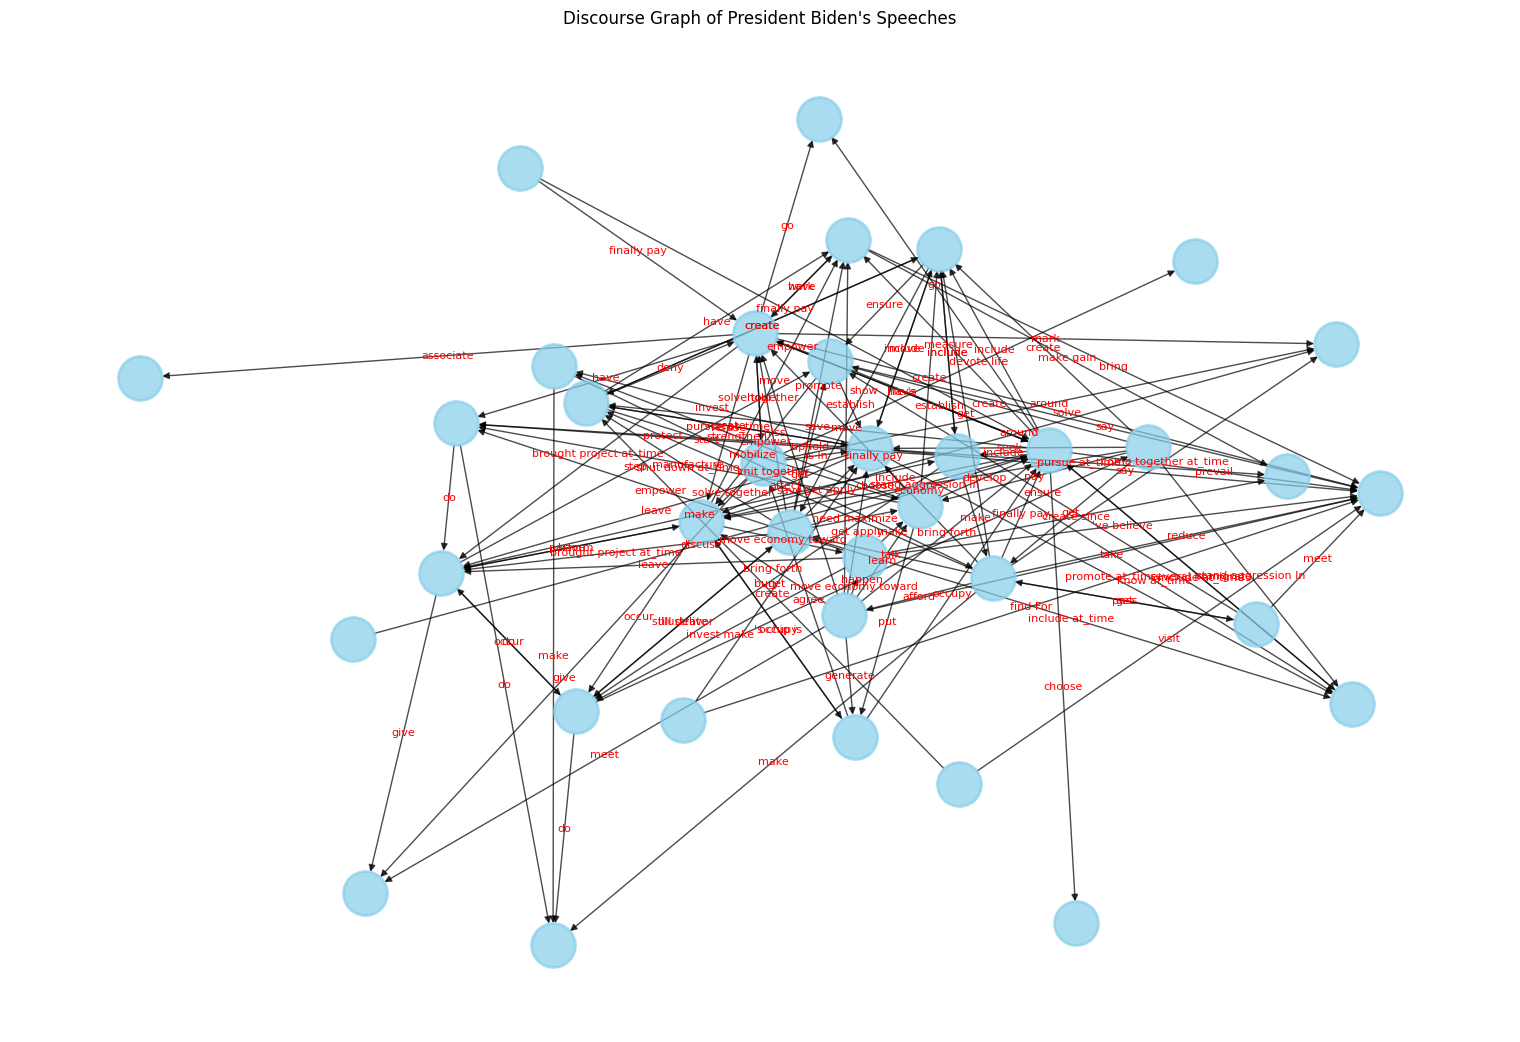

In [282]:
build_and_visualize_graph(transcripts_lemmatized, meaningful_words)

In [279]:
def build_graph(transcripts, meaningful_words):
    lemmatizer = WordNetLemmatizer()
    
    with StanfordOpenIE() as client:
        G = nx.DiGraph()
        elements = []

        for speech in transcripts:
            triples = client.annotate(speech)
            for triple in triples:
                subject = triple['subject']
                predicate = triple['relation']
                object = triple['object']
                
                subjects = []
                if len(subject.split(" ")) > 1:
                    for x in subject.split():
                        subjects.append(lemmatizer.lemmatize(x, "n"))
                
                objects = []
                if len(object.split(" ")) > 1:
                    for x in object.split():
                        objects.append(lemmatizer.lemmatize(x, "n"))

                for sub in subjects:
                    for obj in objects:
                        if sub in meaningful_words and obj in meaningful_words and sub != obj:
                            if (sub, obj) not in elements:
                                G.add_edge(sub, obj, label=lemmatizer.lemmatize(predicate, "v"))
                                elements.append((sub, obj))
                                
        return G

In [281]:
def calculate_laplacian_eigenvalues(G):
    G_undirected = G.to_undirected()
    L = nx.laplacian_matrix(G_undirected).toarray()
    eigenvalues = np.linalg.eigvals(L)
    
    return np.sort(eigenvalues)

def stability_test(transcripts, meaningful_words, removal_fraction=0.05):
    G_initial = build_graph(transcripts, meaningful_words)
    eigenvalues_initial = calculate_laplacian_eigenvalues(G_initial)
    
    num_remove = int(len(transcripts) * removal_fraction)
    transcripts_removed = transcripts[num_remove:]

    G_reduced = build_graph(transcripts_removed, meaningful_words)
    eigenvalues_reduced = calculate_laplacian_eigenvalues(G_reduced)

    return eigenvalues_initial, eigenvalues_reduced

def compare_eigenvalues(eigenvalues_initial, eigenvalues_reduced):
    min_length = min(len(eigenvalues_initial), len(eigenvalues_reduced))
    
    eigenvalues_initial = eigenvalues_initial[:min_length]
    eigenvalues_reduced = eigenvalues_reduced[:min_length]
    
    return np.linalg.norm(eigenvalues_initial - eigenvalues_reduced), np.allclose(eigenvalues_initial, eigenvalues_reduced, atol=1)

G = build_graph(transcripts_lemmatized, meaningful_words)

eigenvalues_initial, eigenvalues_reduced = stability_test(transcripts_lemmatized, meaningful_words)
print("Initial eigenvalues:", eigenvalues_initial)
print("Eigenvalues after removal:", eigenvalues_reduced)

value, stable = compare_eigenvalues(eigenvalues_initial, eigenvalues_reduced)
print("The graph is stable (True/False):", stable)
print("Graph similarity:", value)

Starting server with command: java -Xmx8G -cp /Users/i.s.melnikov/.stanfordnlp_resources/stanford-corenlp-4.5.3/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-356f04d483634535.props -preload openie


Exception ignored in: <function StanfordOpenIE.__del__ at 0x123c1d940>
Traceback (most recent call last):
  File "/Users/i.s.melnikov/PycharmProjects/sna/.venv/lib/python3.9/site-packages/openie/openie.py", line 116, in __del__
    del os.environ['CORENLP_HOME']
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/os.py", line 695, in __delitem__
    raise KeyError(key) from None
KeyError: 'CORENLP_HOME'


Starting server with command: java -Xmx8G -cp /Users/i.s.melnikov/.stanfordnlp_resources/stanford-corenlp-4.5.3/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-0b6ff414a20c462a.props -preload openie
Starting server with command: java -Xmx8G -cp /Users/i.s.melnikov/.stanfordnlp_resources/stanford-corenlp-4.5.3/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-8b0d0c4c406f42c1.props -preload openie
Initial eigenvalues: [1.48070559e-15 8.15102767e-01 9.14633021e-01 9.80877031e-01
 1.00000000e+00 1.72184253e+00 1.83198603e+00 1.92379246e+00
 2.00000000e+00 2.47969952e+00 2.59430196e+00 2.69048252e+00
 3.25109445e+00 3.52011296e+00 4.22777996e+00 4.47318844e+00
 5.26391792e+00 6.02680528e+00 6.43382335e+00 6.91455186e+00
 7.23168882e+00 7.63916446e+00 8.69760032e+00 8.78178979e+00
 9.